In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re


# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the drill data and select the required coloumns
drill = pd.read_csv('drill_data.csv')
drill = drill[['Td Depth (m)', 'Spud Date', 'Rig Rels Date']]
drill.head()

,Td Depth (m),Spud Date,Rig Rels Date
0,568.5,19480709,19481211.0
1,1097.3,19490809,19500726.0
2,533.4,19480709,19490725.0
3,1816.2,19490807,19521223.0
4,2780.1,19491117,19500813.0


In [3]:
#Filter the data the is only between 2019 and 2021 in ascending order
drill_date = drill.loc[(drill['Spud Date'] >= 20190101) & (drill['Spud Date'] <= 20211231)]
drill_date_sorted = drill_date.sort_values(by='Spud Date', ascending=True)

In [4]:
#Check for empty cells
drill_date_sorted.isna().sum()

Td Depth (m)     0
Spud Date        0
Rig Rels Date    4
dtype: int64

In [5]:
# Add NaN in empty cells to remove
drill_date_sorted['Td Depth (m)'].replace(' ', np.nan, inplace=True)
drill_date_sorted.head()

,Td Depth (m),Spud Date,Rig Rels Date
29201,4425,20190101,20190126.0
29200,1875,20190101,20190126.0
28770,4367,20190103,20190121.0
28117,4319,20190103,20190218.0
29197,3933,20190104,20190122.0


In [6]:
#Drop all empty cells
drill_date_sorted.dropna(subset=['Td Depth (m)'], inplace=True)
drill_date_sorted

,Td Depth (m),Spud Date,Rig Rels Date
29201,4425,20190101,20190126.0
29200,1875,20190101,20190126.0
28770,4367,20190103,20190121.0
28117,4319,20190103,20190218.0
29197,3933,20190104,20190122.0
...,...,...,...
30229,4495,20211217,20220110.0
30230,4660,20211218,20220101.0
30218,5415,20211220,20220105.0
30223,5504,20211221,20220109.0


In [7]:
drill_date_sorted.isna().sum()

Td Depth (m)     0
Spud Date        0
Rig Rels Date    0
dtype: int64

In [8]:
#Check the types in the dataframe
drill_date_sorted.dtypes

Td Depth (m)      object
Spud Date          int64
Rig Rels Date    float64
dtype: object

In [9]:
#Convert Rig Date to int and Td Depth to fload
drill_date_sorted['Rig Rels Date']= drill_date_sorted['Rig Rels Date'].astype('int64')
drill_date_sorted['Td Depth (m)']= drill_date_sorted['Td Depth (m)'].astype('float')
drill_date_sorted

,Td Depth (m),Spud Date,Rig Rels Date
29201,4425.0,20190101,20190126
29200,1875.0,20190101,20190126
28770,4367.0,20190103,20190121
28117,4319.0,20190103,20190218
29197,3933.0,20190104,20190122
...,...,...,...
30229,4495.0,20211217,20220110
30230,4660.0,20211218,20220101
30218,5415.0,20211220,20220105
30223,5504.0,20211221,20220109


In [10]:
drill_date_sorted.describe()

,Td Depth (m),Spud Date,Rig Rels Date
count,1195.000000,1.195000e+03,1.195000e+03
mean,4602.647197,2.020124e+07,2.020208e+07
std,926.623402,8.282623e+03,8.277855e+03
min,607.000000,2.019010e+07,2.019012e+07
25%,4090.000000,2.019102e+07,2.019112e+07
50%,4629.000000,2.020082e+07,2.020101e+07
75%,5162.000000,2.021041e+07,2.021051e+07
max,7168.000000,2.021123e+07,2.022011e+07


In [11]:
# Turn start and end dates into datetimes
format = '%Y/%m/%d'
drill_date_sorted['Start_Phase'] = pd.to_datetime(drill_date_sorted['Spud Date'].astype("string"), format=format)
drill_date_sorted['End_Phase'] = pd.to_datetime(drill_date_sorted['Rig Rels Date'].astype("string"), format=format)

# Calculate duration
oneday = pd.Timedelta(days=1)
drill_date_sorted['Duration'] = (drill_date_sorted['End_Phase'] - drill_date_sorted['Start_Phase'])/ oneday

print(drill_date_sorted.info())
drill_date_sorted.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 29201 to 28254
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Td Depth (m)   1195 non-null   float64       
 1   Spud Date      1195 non-null   int64         
 2   Rig Rels Date  1195 non-null   int64         
 3   Start_Phase    1195 non-null   datetime64[ns]
 4   End_Phase      1195 non-null   datetime64[ns]
 5   Duration       1195 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 65.4 KB
None


,Td Depth (m),Spud Date,Rig Rels Date,Start_Phase,End_Phase,Duration
29201,4425.0,20190101,20190126,2019-01-01,2019-01-26,25.0
29200,1875.0,20190101,20190126,2019-01-01,2019-01-26,25.0
28770,4367.0,20190103,20190121,2019-01-03,2019-01-21,18.0
28117,4319.0,20190103,20190218,2019-01-03,2019-02-18,46.0
29197,3933.0,20190104,20190122,2019-01-04,2019-01-22,18.0
28009,4397.0,20190107,20190130,2019-01-07,2019-01-30,23.0
29350,4140.0,20190110,20190126,2019-01-10,2019-01-26,16.0
29341,4769.0,20190110,20190123,2019-01-10,2019-01-23,13.0
29568,5631.0,20190111,20190130,2019-01-11,2019-01-30,19.0
29458,3387.0,20190111,20190123,2019-01-11,2019-01-23,12.0


In [12]:
drill_date_sorted['Depth_per_day'] = drill_date_sorted['Td Depth (m)']/drill_date_sorted['Duration']
drill_date_sorted

,Td Depth (m),Spud Date,Rig Rels Date,Start_Phase,End_Phase,Duration,Depth_per_day
29201,4425.0,20190101,20190126,2019-01-01,2019-01-26,25.0,177.000000
29200,1875.0,20190101,20190126,2019-01-01,2019-01-26,25.0,75.000000
28770,4367.0,20190103,20190121,2019-01-03,2019-01-21,18.0,242.611111
28117,4319.0,20190103,20190218,2019-01-03,2019-02-18,46.0,93.891304
29197,3933.0,20190104,20190122,2019-01-04,2019-01-22,18.0,218.500000
...,...,...,...,...,...,...,...
30229,4495.0,20211217,20220110,2021-12-17,2022-01-10,24.0,187.291667
30230,4660.0,20211218,20220101,2021-12-18,2022-01-01,14.0,332.857143
30218,5415.0,20211220,20220105,2021-12-20,2022-01-05,16.0,338.437500
30223,5504.0,20211221,20220109,2021-12-21,2022-01-09,19.0,289.684211


In [13]:
drill_date_sorted2 = drill_date_sorted[['Start_Phase', 'End_Phase', 'Depth_per_day']]
drill_date_sorted2.head()

,Start_Phase,End_Phase,Depth_per_day
29201,2019-01-01,2019-01-26,177.000000
29200,2019-01-01,2019-01-26,75.000000
28770,2019-01-03,2019-01-21,242.611111
28117,2019-01-03,2019-02-18,93.891304
29197,2019-01-04,2019-01-22,218.500000


In [14]:
df2 = pd.melt(drill_date_sorted2, id_vars='Depth_per_day', value_name='Date')
df2.Date = pd.to_datetime(df2.Date)
df3 = df2[df2['Date'] < '2022-01-01']
df3.set_index('Date', inplace=True)
df3.drop('variable', axis=1, inplace=True)
print (df3)

            Depth_per_day
Date                     
2019-01-01     177.000000
2019-01-01      75.000000
2019-01-03     242.611111
2019-01-03      93.891304
2019-01-04     218.500000
...                   ...
2021-12-28     134.096774
2021-12-21     158.826087
2021-12-14     282.666667
2021-12-08     408.111111
2021-12-16     383.333333

[2379 rows x 1 columns]


In [15]:
df4 = df3.groupby(['Depth_per_day']).resample('D').ffill().reset_index(level=0, drop=True).reset_index()
print (df4)

            Date  Depth_per_day
0     2020-03-29      15.371951
1     2020-03-30      15.371951
2     2020-03-31      15.371951
3     2020-04-01      15.371951
4     2020-04-02      15.371951
...          ...            ...
51742 2021-04-20     708.000000
51743 2021-04-21     708.000000
51744 2021-04-22     708.000000
51745 2021-04-23     708.000000
51746 2021-04-24     708.000000

[51747 rows x 2 columns]


In [16]:
drill_date_sorted3 = pd.merge(drill_date_sorted2, df4)
drill_date_sorted3.head(30)

,Start_Phase,End_Phase,Depth_per_day,Date
0,2019-01-01,2019-01-26,177.0,2019-01-01
1,2019-01-01,2019-01-26,177.0,2019-01-02
2,2019-01-01,2019-01-26,177.0,2019-01-03
3,2019-01-01,2019-01-26,177.0,2019-01-04
4,2019-01-01,2019-01-26,177.0,2019-01-05
5,2019-01-01,2019-01-26,177.0,2019-01-06
6,2019-01-01,2019-01-26,177.0,2019-01-07
7,2019-01-01,2019-01-26,177.0,2019-01-08
8,2019-01-01,2019-01-26,177.0,2019-01-09
9,2019-01-01,2019-01-26,177.0,2019-01-10


In [17]:
drill_final = drill_date_sorted3.groupby(['Date']).sum()
drill_final.head()

,Depth_per_day
Date,
2019-01-01,252.000000
2019-01-02,252.000000
2019-01-03,588.502415
2019-01-04,807.002415
2019-01-05,807.002415


<AxesSubplot:xlabel='Date'>

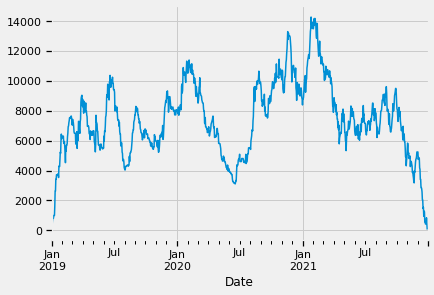

In [18]:
drill_final['Depth_per_day'].plot.line()